In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import TargetEncoder,OneHotEncoder

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df=pd.read_csv('train_Inceptez20.csv')
df_test=pd.read_csv('test_Inceptez20.csv')

In [3]:
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [4]:
df.shape

(50000, 44)

## Checking the Nan Values in the dataset - No Nan values observed

In [5]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

## Checking the Target Feature is_claim - Feature Imbalance Observed

In [6]:
df['is_claim'].value_counts()

0    46771
1     3229
Name: is_claim, dtype: int64

In [7]:
df['is_claim'].value_counts()/len(df)*100

0    93.542
1     6.458
Name: is_claim, dtype: float64

## Splitting the Dataset into Train and Val(Validation dataset) (75 - 25 ratio)

In [8]:
df_train,df_val=train_test_split(df,test_size=0.25,random_state=43,stratify=df['is_claim'])

In [9]:
df_train.shape

(37500, 44)

In [10]:
df_val.shape

(12500, 44)

In [11]:
df_train['is_claim'].value_counts()

0    35078
1     2422
Name: is_claim, dtype: int64

In [12]:
df_train['is_claim'].value_counts()/len(df_train)*100

0    93.541333
1     6.458667
Name: is_claim, dtype: float64

In [13]:
df_val['is_claim'].value_counts()

0    11693
1      807
Name: is_claim, dtype: int64

In [14]:
df_val['is_claim'].value_counts()/len(df_val)*100

0    93.544
1     6.456
Name: is_claim, dtype: float64

## Checking Generic Structure of Dataframe and if there exist any duplicates

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 24887 to 45585
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         37500 non-null  object 
 1   policy_tenure                     37500 non-null  float64
 2   age_of_car                        37500 non-null  float64
 3   age_of_policyholder               37500 non-null  float64
 4   area_cluster                      37500 non-null  object 
 5   population_density                37500 non-null  int64  
 6   make                              37500 non-null  int64  
 7   segment                           37500 non-null  object 
 8   model                             37500 non-null  object 
 9   fuel_type                         37500 non-null  object 
 10  max_torque                        37500 non-null  object 
 11  max_power                         37500 non-null  object 
 12  

In [16]:
df_train[df_train.duplicated()]

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim


## Splitting the Features into Categorical and Numerical Features
1. The Number of Categorical Featured are more compared to Numerical Features


In [17]:
numerical_features = [features for features in df_train.columns if df_train[features].dtype != 'object']
categorical_features = [features for features in df_train.columns if df_train[features].dtype == 'object']

print('Numerical Features :\n',numerical_features)
print('\n')
print('Categorical Features :\n',categorical_features)

Numerical Features :
 ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


Categorical Features :
 ['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [18]:
print('Number of Numerical Features :', len(numerical_features))
print('Number of Categorical Features :', len(categorical_features))

Number of Numerical Features : 16
Number of Categorical Features : 28


### Adding the max_torque and max_power to numerical features & removing it from categorical features. Check the analysis done below on the categorical features to understand further.

In [21]:
numerical_features.append('max_torque')
numerical_features.append('max_power')

In [22]:
categorical_features.remove('max_torque')

In [23]:
categorical_features.remove('max_power')

In [24]:
df_train['max_torque']=df_train['max_torque'].apply(lambda x : float(x.split('Nm@')[0]))
df_train['max_power']=df_train['max_power'].apply(lambda x : float(x.split('bhp@')[0]))

In [29]:
df_train[df_train['max_power']==0]

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim


### Performing the same in validation & test dataset

In [47]:
df_val['max_torque']=df_val['max_torque'].apply(lambda x : float(x.split('Nm@')[0]))
df_val['max_power']=df_val['max_power'].apply(lambda x : float(x.split('bhp@')[0]))

In [48]:
df_test['max_torque']=df_test['max_torque'].apply(lambda x : float(x.split('Nm@')[0]))
df_test['max_power']=df_test['max_power'].apply(lambda x : float(x.split('bhp@')[0]))

## Checking correlation among the independent numerical features

In [49]:
df_train[numerical_features].corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,max_torque,max_power
policy_tenure,1.000000,0.169043,0.141373,-0.097193,0.090038,0.107824,0.197722,0.192647,0.099864,0.172593,0.194806,0.217199,0.117196,0.144723,0.178654,0.082709,0.155795,0.210349
age_of_car,0.169043,1.000000,-0.036467,-0.062482,0.183384,0.203375,0.393872,0.384014,0.196995,0.331564,0.383306,0.418795,0.256516,0.298154,0.352313,-0.033294,0.306322,0.412641
age_of_policyholder,0.141373,-0.036467,1.000000,0.010425,-0.029173,-0.005130,-0.022746,0.003754,0.000499,-0.016152,-0.019120,-0.007520,-0.051177,-0.005001,-0.032055,0.026209,-0.012875,-0.012341
population_density,-0.097193,-0.062482,0.010425,1.000000,-0.035774,-0.063466,-0.091491,-0.092075,-0.059793,-0.078477,-0.093225,-0.098084,-0.066303,-0.079981,-0.069840,-0.021463,-0.076862,-0.097263
make,0.090038,0.183384,-0.029173,-0.035774,1.000000,0.502418,0.753530,0.412472,0.630684,0.752723,0.692309,0.511682,0.300081,0.477551,0.791862,0.001535,0.829454,0.643902
airbags,0.107824,0.203375,-0.005130,-0.063466,0.502418,1.000000,0.661037,0.477664,0.862013,0.812097,0.809087,0.639538,0.423559,0.829600,0.344752,-0.000047,0.801564,0.694614
displacement,0.197722,0.393872,-0.022746,-0.091491,0.753530,0.661037,1.000000,0.866786,0.691693,0.875271,0.961653,0.899111,0.553302,0.774328,0.848461,0.005457,0.931277,0.962760
cylinder,0.192647,0.384014,0.003754,-0.092075,0.412472,0.477664,0.866786,1.000000,0.411003,0.616840,0.805921,0.862219,0.352235,0.602403,0.601210,0.008755,0.686913,0.876557
gear_box,0.099864,0.196995,0.000499,-0.059793,0.630684,0.862013,0.691693,0.411003,1.000000,0.861717,0.809034,0.602249,0.577529,0.894451,0.528869,-0.002337,0.884739,0.712042
turning_radius,0.172593,0.331564,-0.016152,-0.078477,0.752723,0.812097,0.875271,0.616840,0.861717,1.000000,0.945094,0.826317,0.458447,0.822176,0.780070,0.002482,0.946621,0.896626


<Axes: >

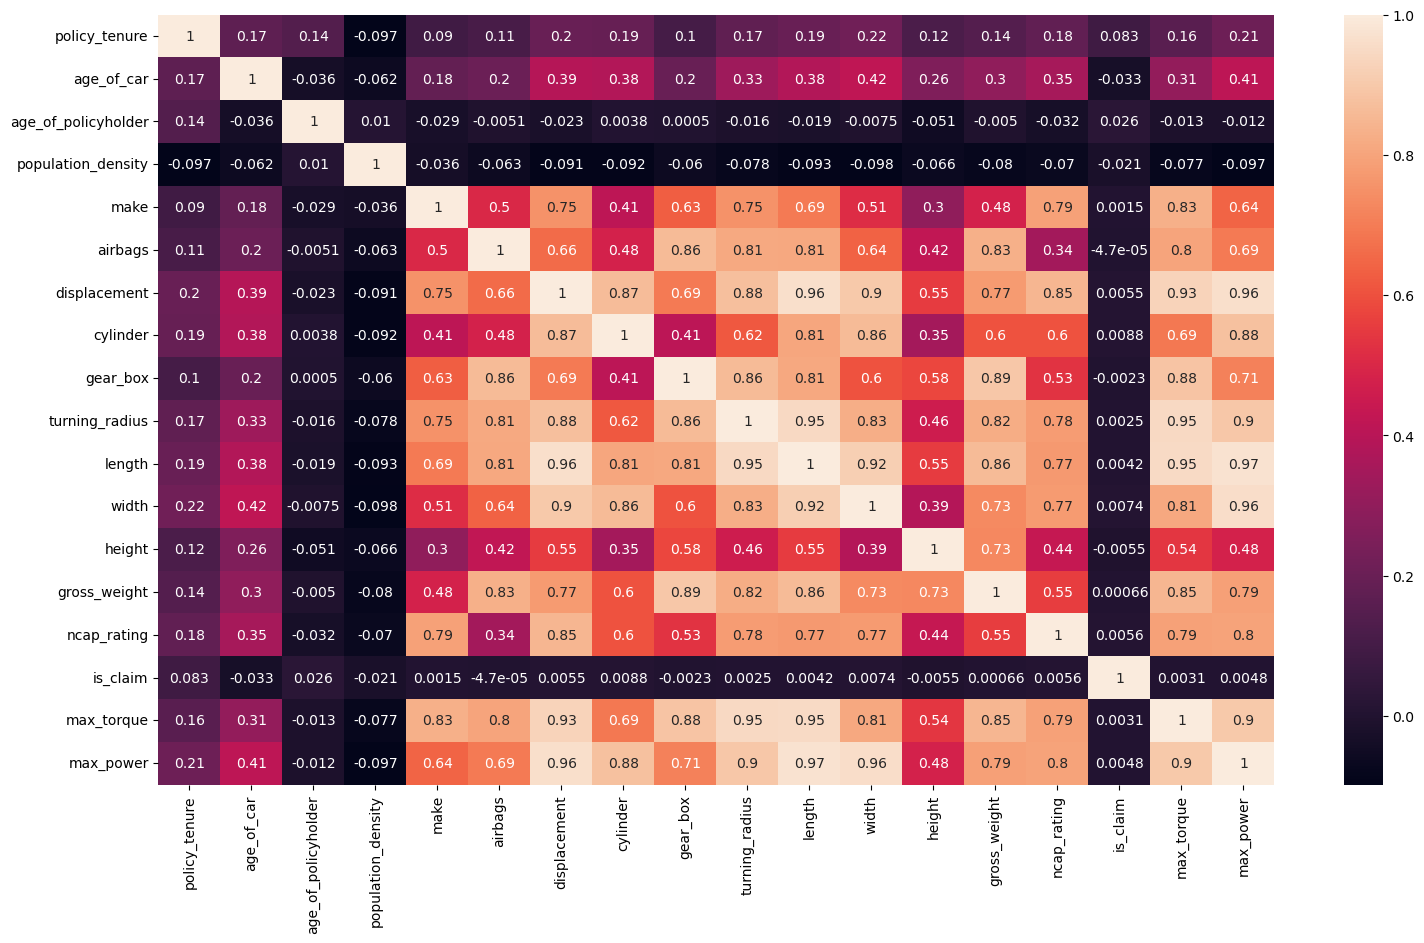

In [50]:
plt.figure(figsize=(18,10))
sns.heatmap(df_train[numerical_features].corr(),annot=True)

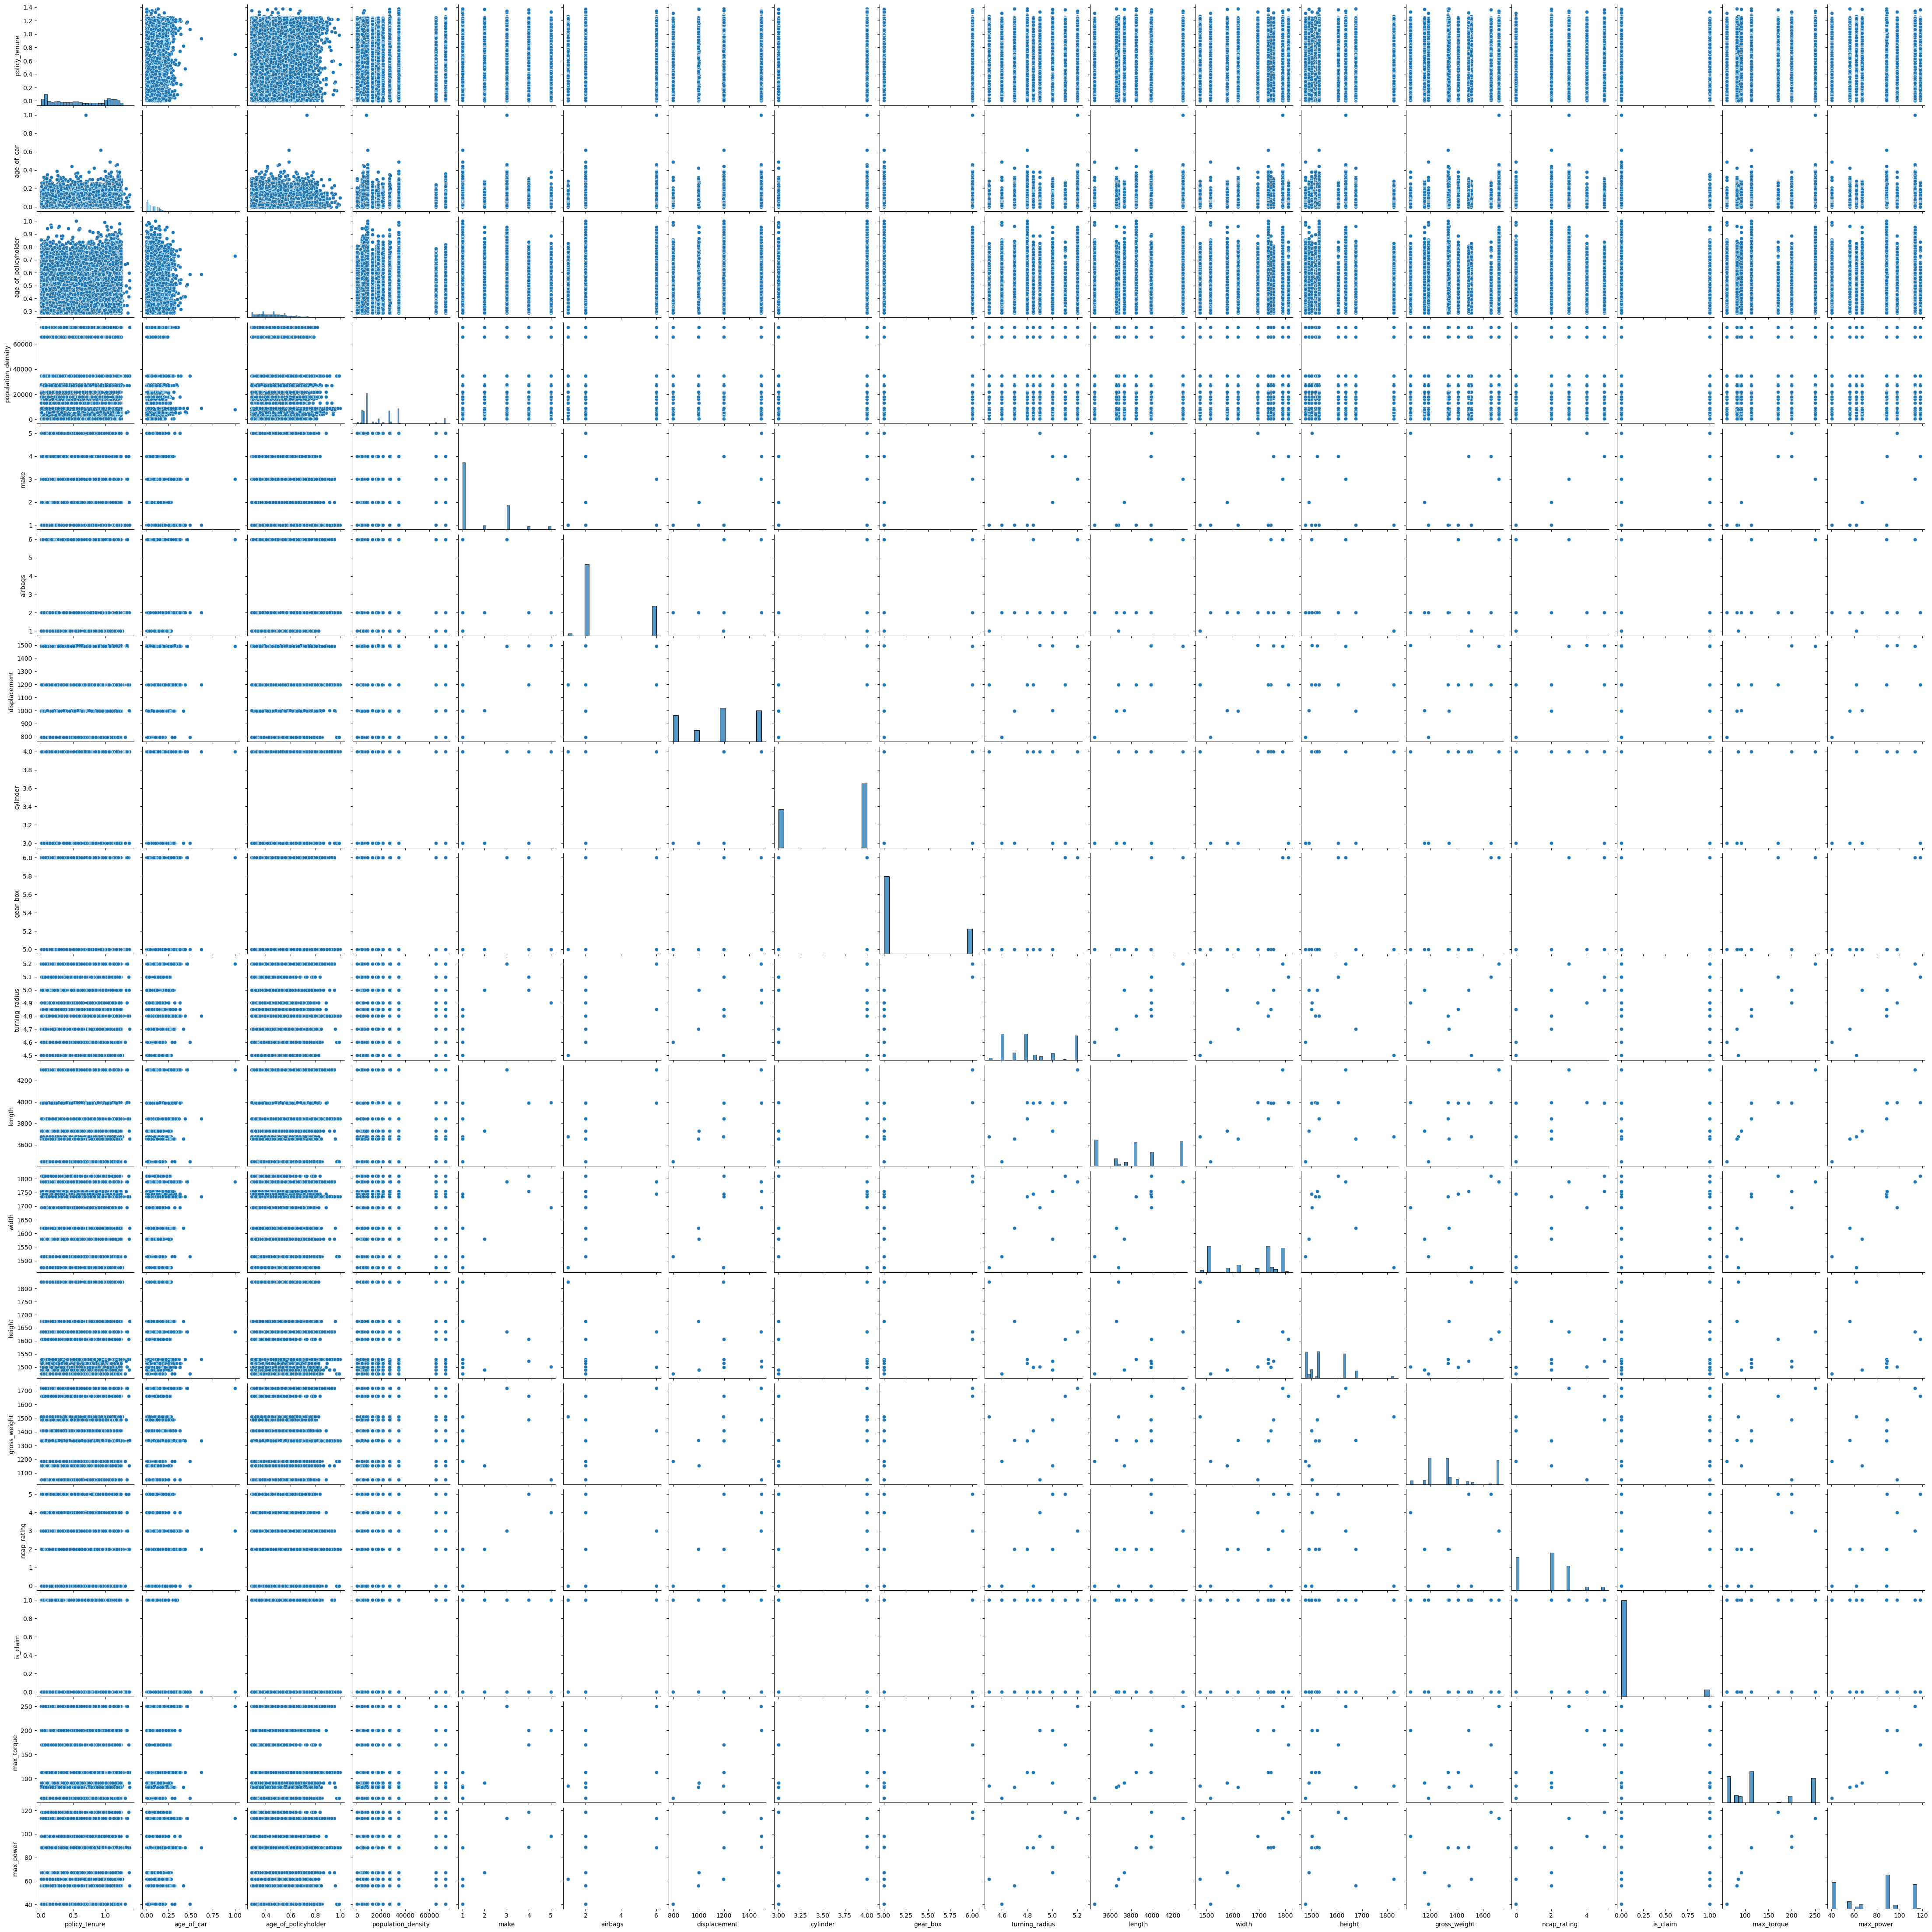

In [51]:
sns.pairplot(df_train[numerical_features])

In [52]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [53]:
calc_vif(df_train[numerical_features])

C:\Users\sarav\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,policy_tenure,1.106272
1,age_of_car,1.289240
2,age_of_policyholder,1.037120
3,population_density,1.018327
4,make,inf
5,airbags,inf
6,displacement,inf
7,cylinder,inf
8,gear_box,inf
9,turning_radius,inf


### Checking the distribution of each Numeric feature

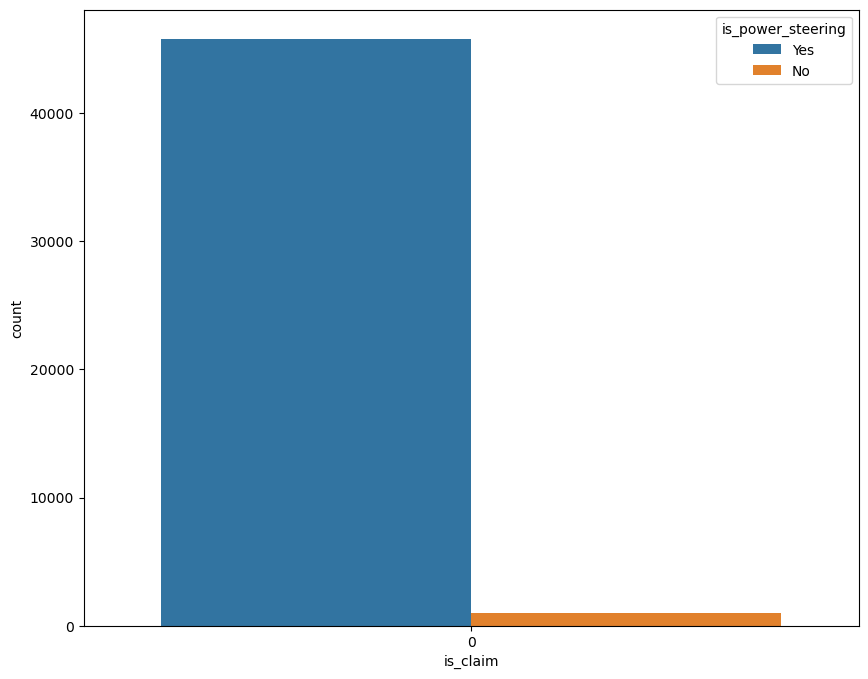

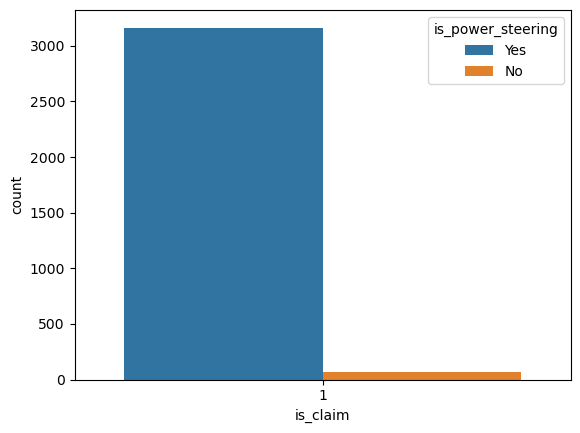

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(x='is_claim',data=df[df['is_claim']==0],hue='is_power_steering')
plt.show()
sns.countplot(x='is_claim',data=df[df['is_claim']==1],hue='is_power_steering')
plt.show()

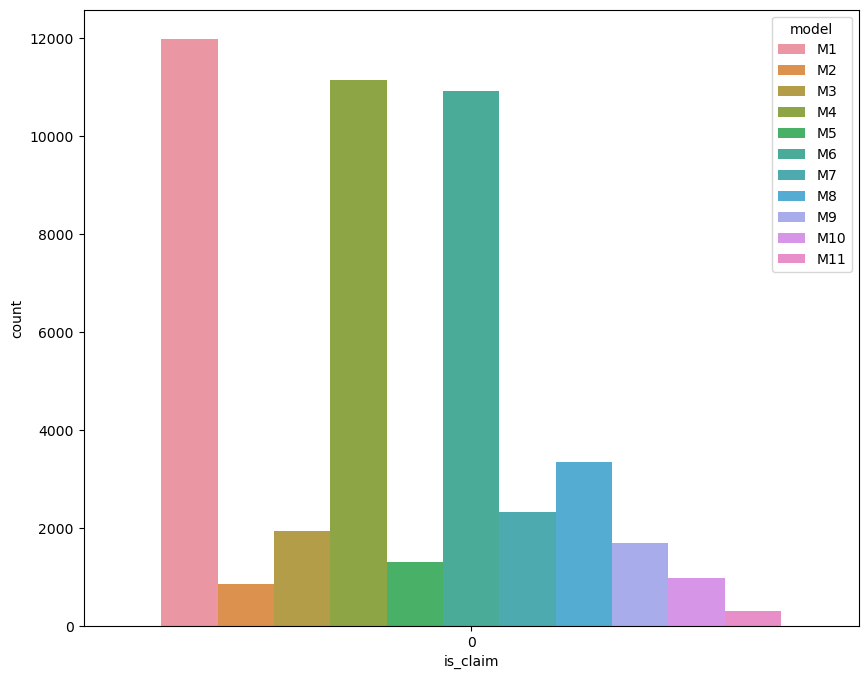

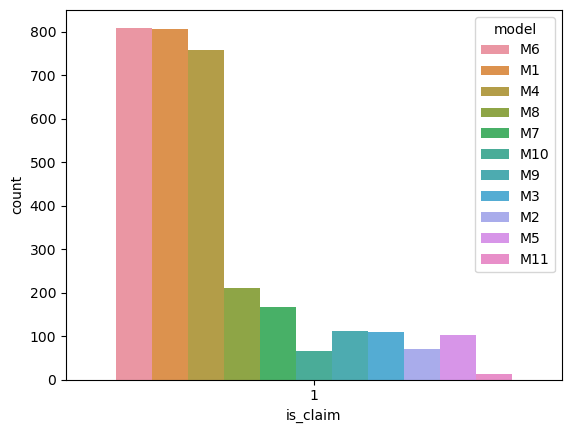

In [65]:
plt.figure(figsize=(10,8))
sns.countplot(x='is_claim',data=df[df['is_claim']==0],hue='model')
plt.show()
sns.countplot(x='is_claim',data=df[df['is_claim']==1],hue='model')
plt.show()

<Axes: xlabel='max_torque', ylabel='max_power'>

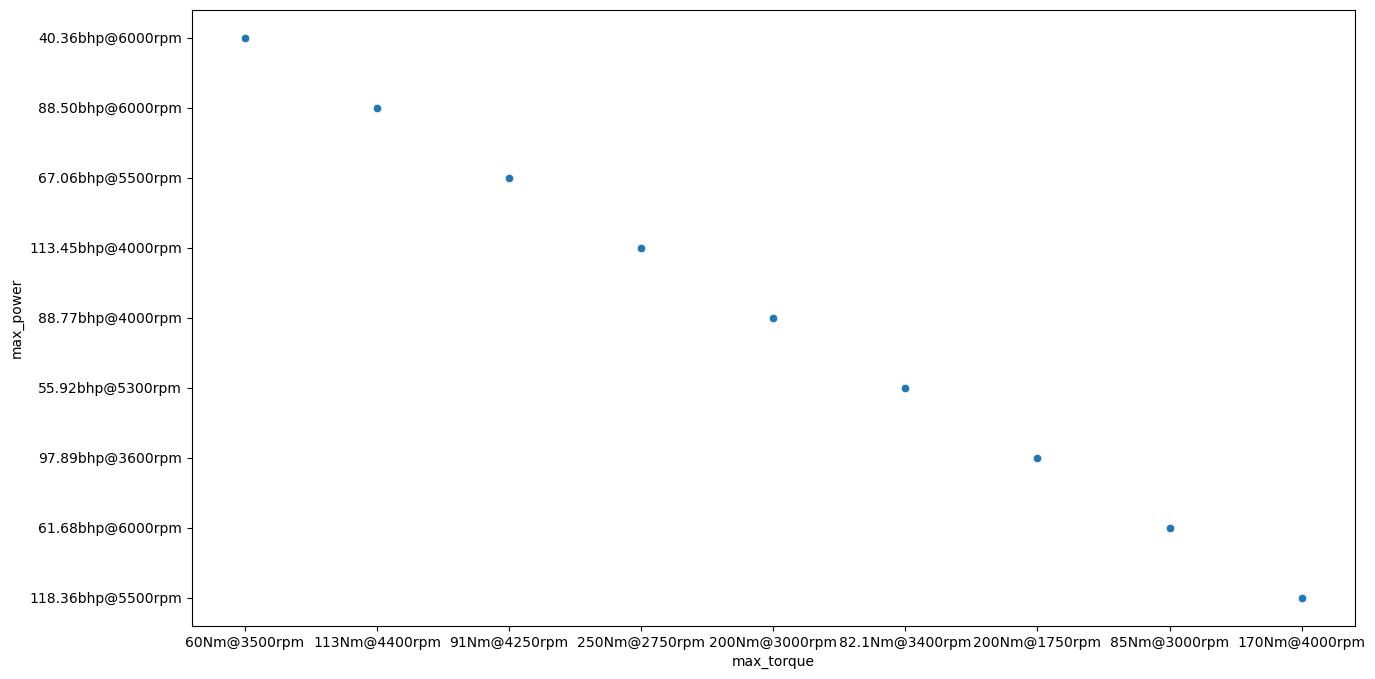

In [72]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='max_torque',y='max_power',data=df)

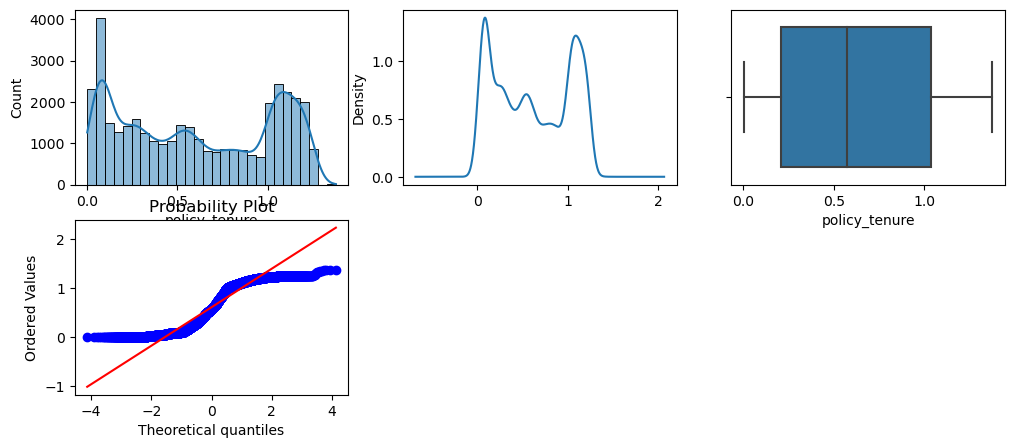

<Figure size 640x480 with 0 Axes>

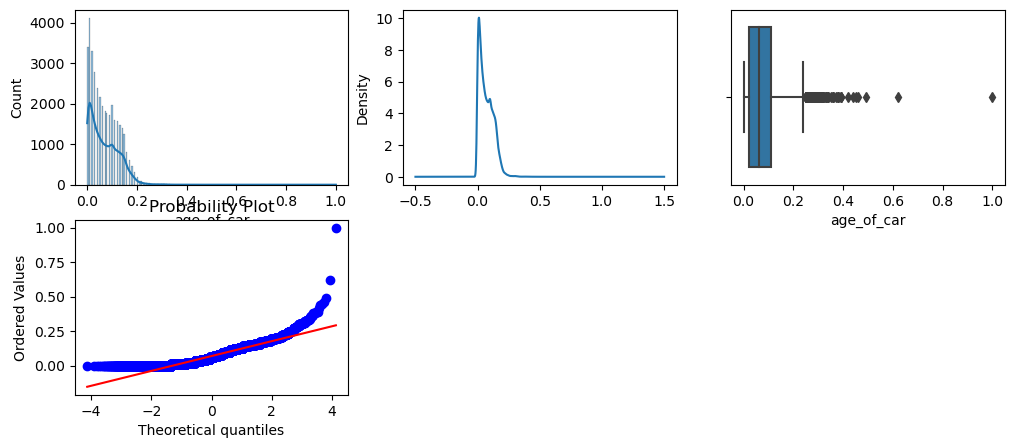

<Figure size 640x480 with 0 Axes>

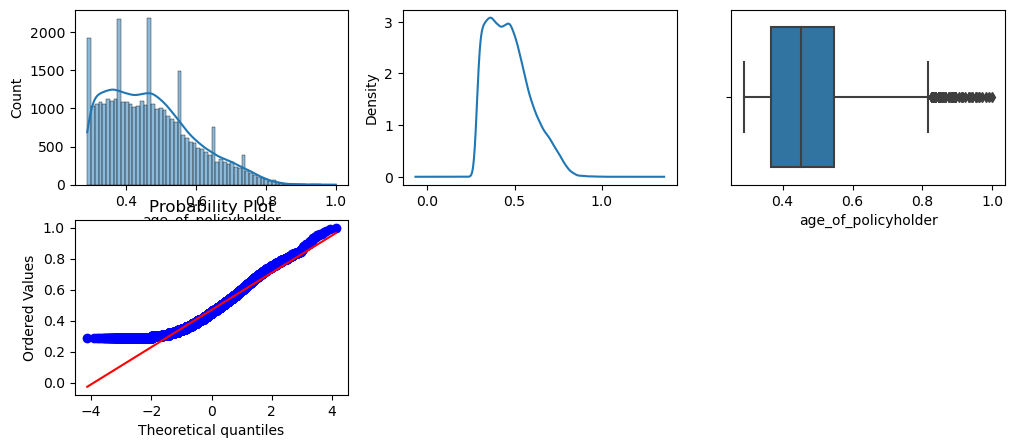

<Figure size 640x480 with 0 Axes>

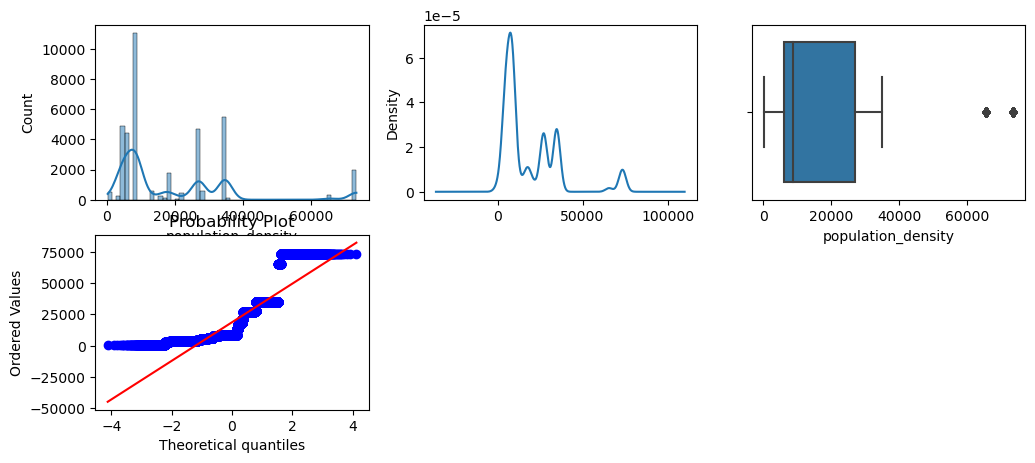

<Figure size 640x480 with 0 Axes>

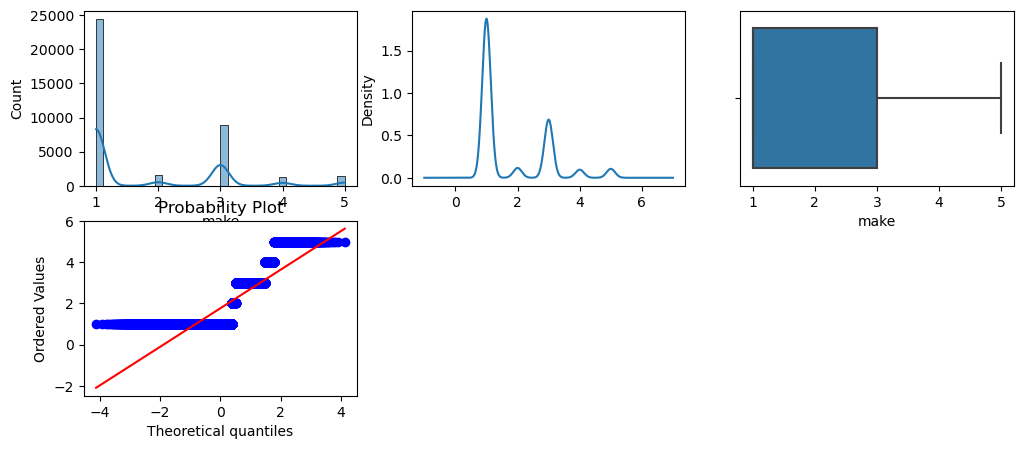

<Figure size 640x480 with 0 Axes>

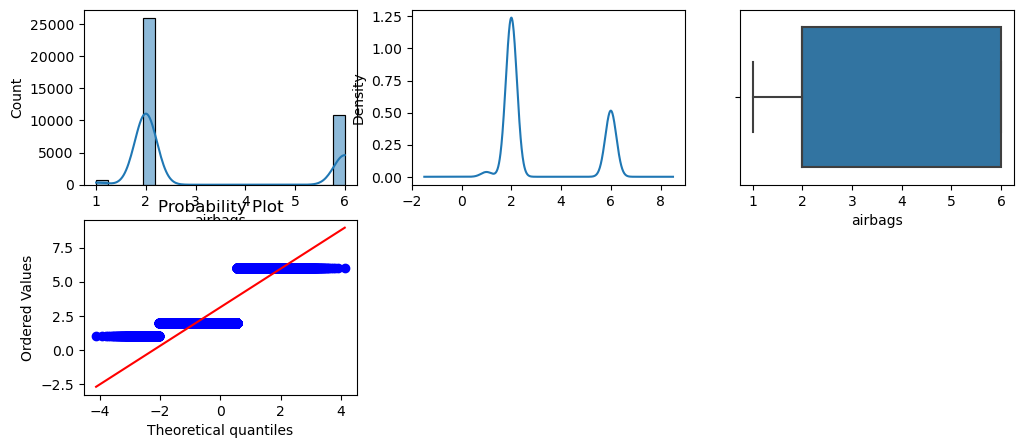

<Figure size 640x480 with 0 Axes>

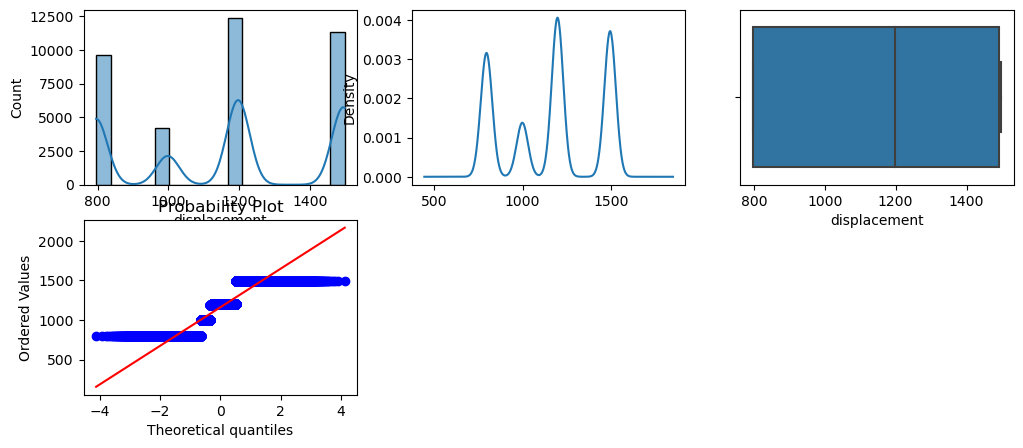

<Figure size 640x480 with 0 Axes>

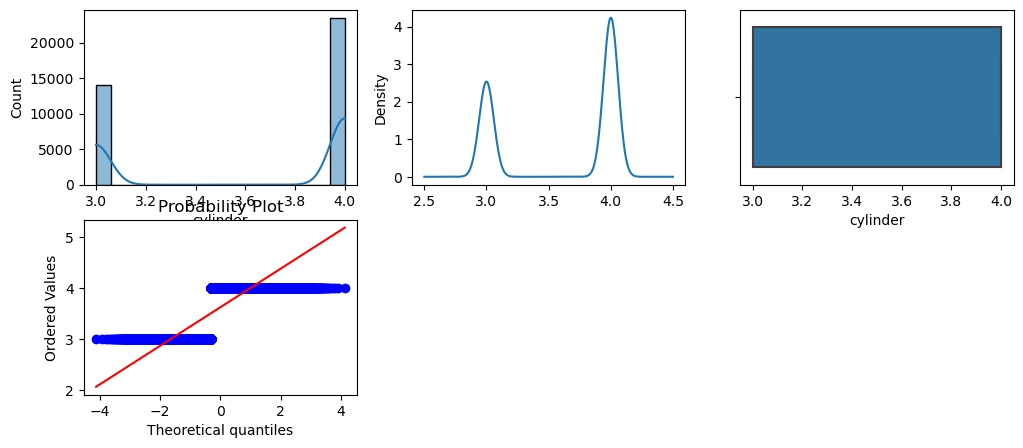

<Figure size 640x480 with 0 Axes>

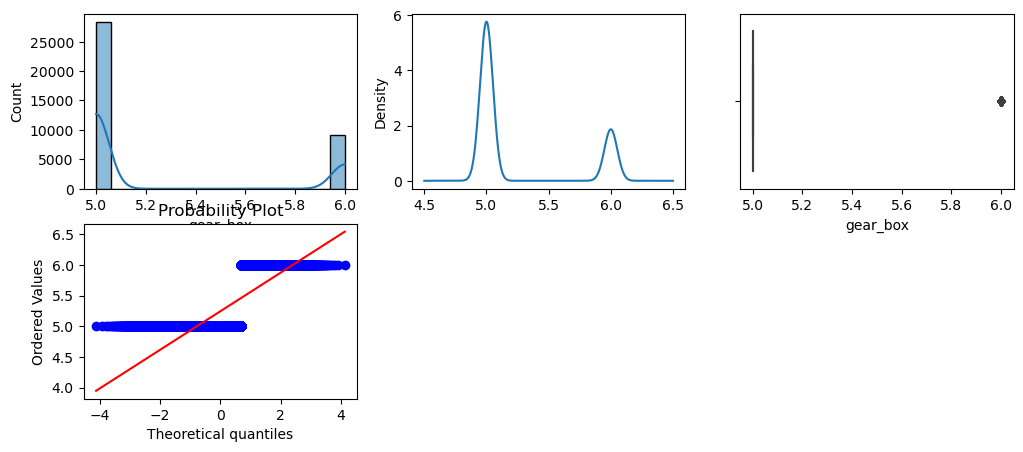

<Figure size 640x480 with 0 Axes>

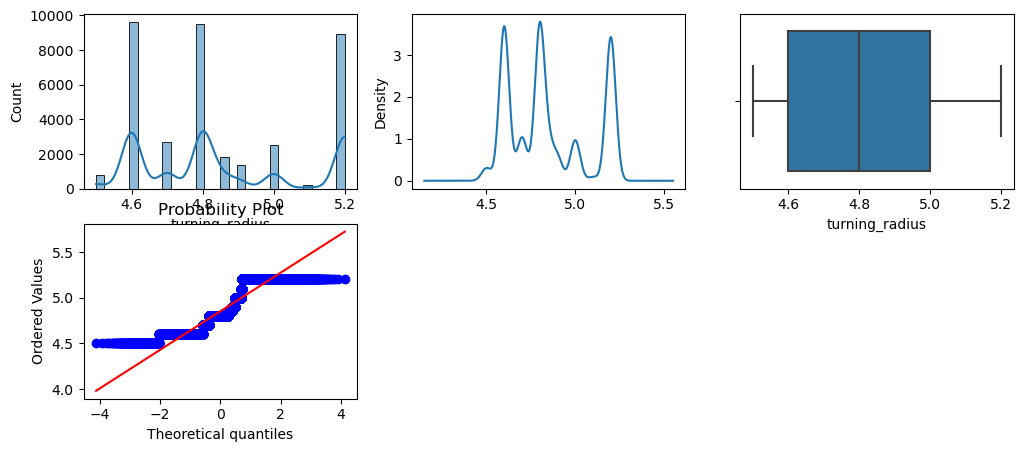

<Figure size 640x480 with 0 Axes>

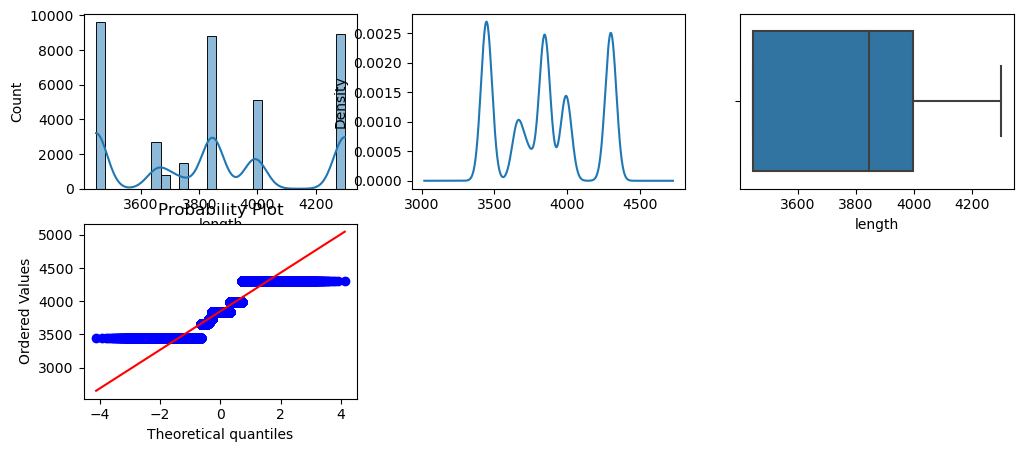

<Figure size 640x480 with 0 Axes>

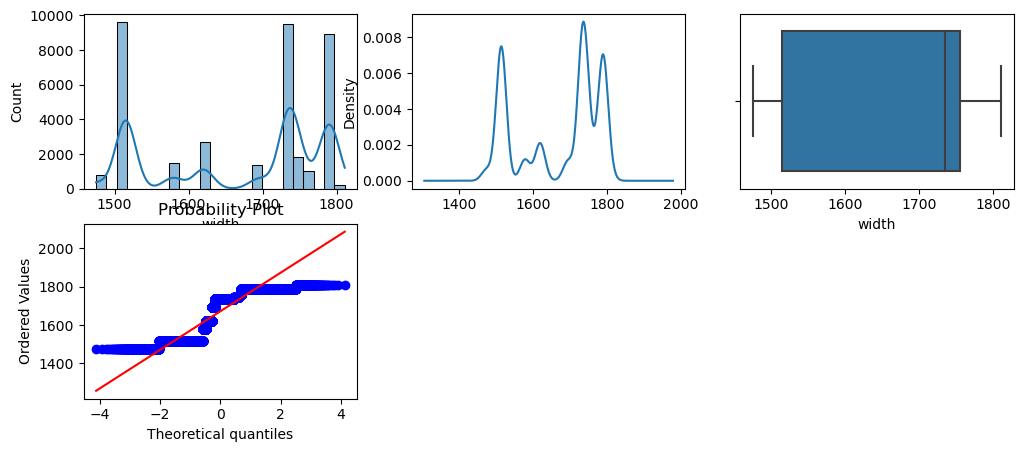

<Figure size 640x480 with 0 Axes>

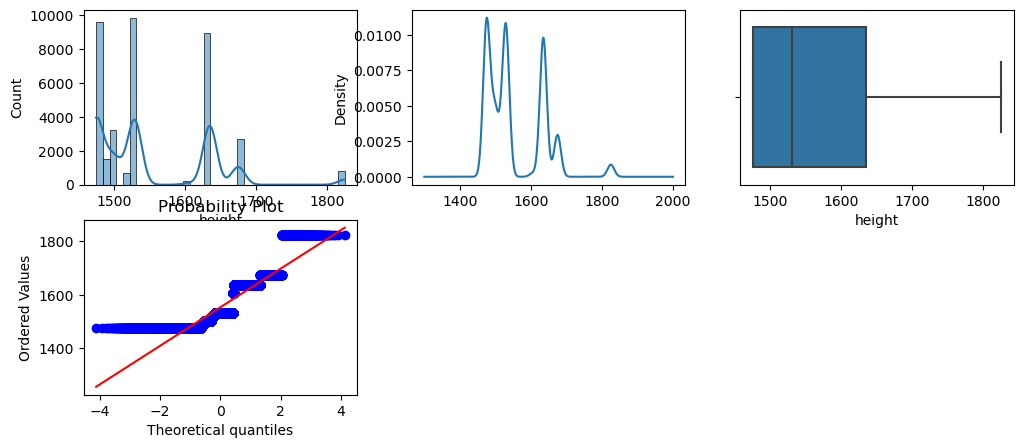

<Figure size 640x480 with 0 Axes>

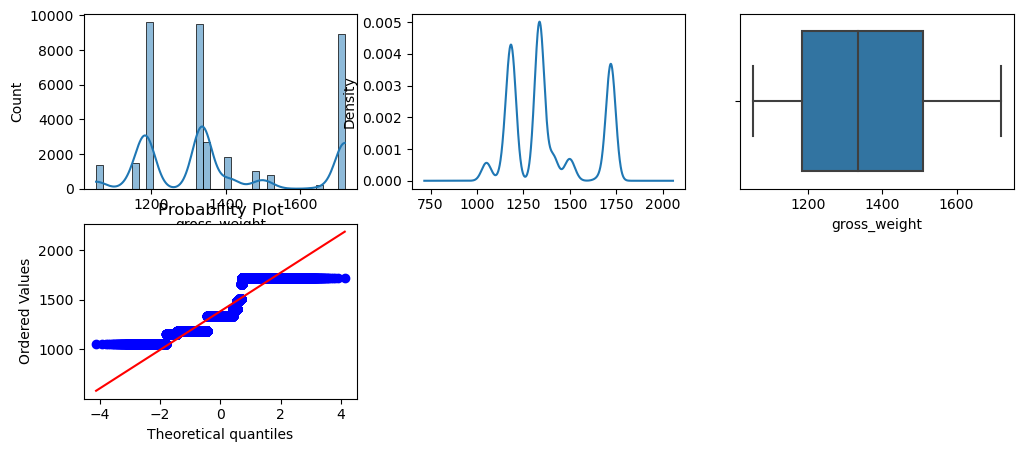

<Figure size 640x480 with 0 Axes>

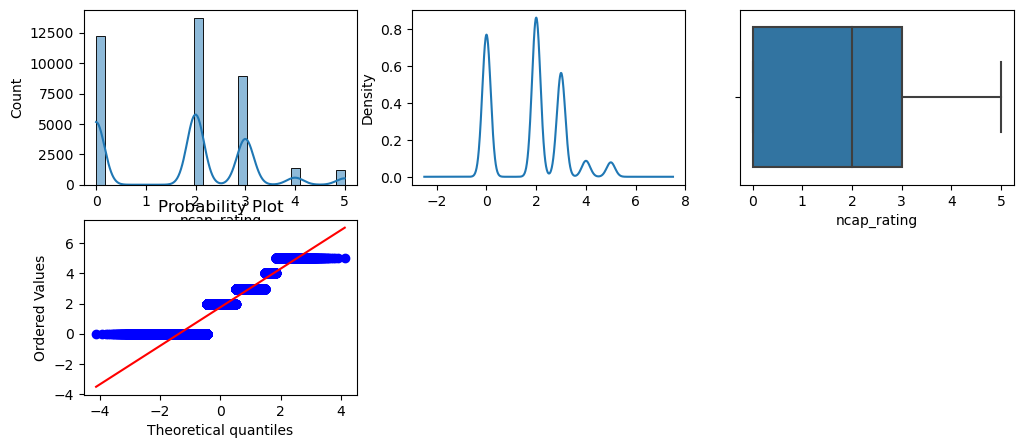

<Figure size 640x480 with 0 Axes>

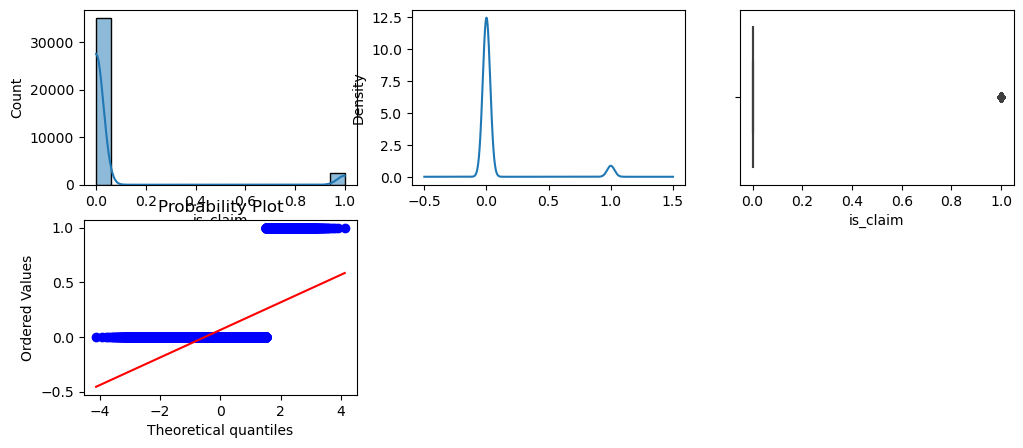

<Figure size 640x480 with 0 Axes>

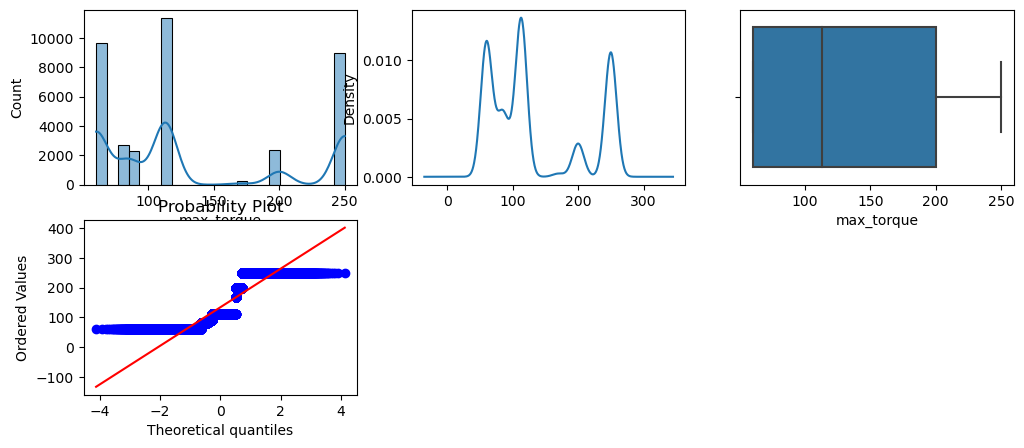

<Figure size 640x480 with 0 Axes>

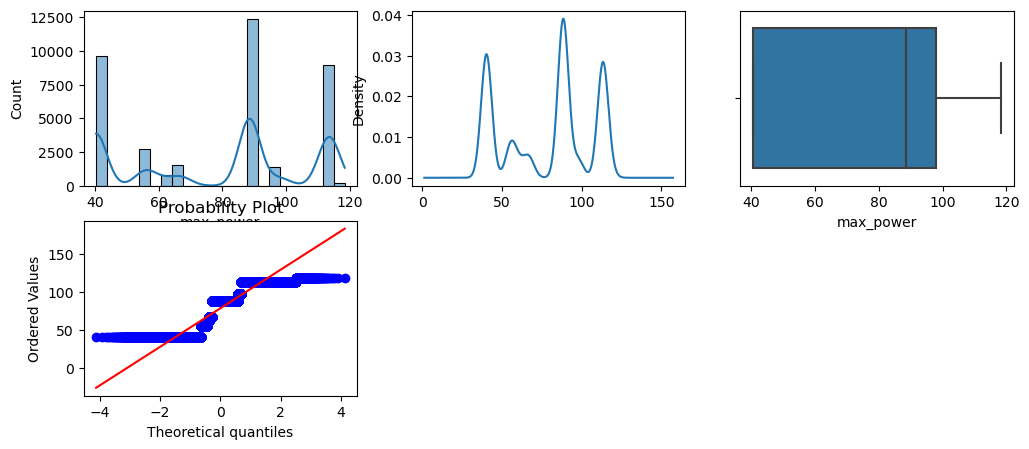

<Figure size 640x480 with 0 Axes>

In [54]:
for features in numerical_features:
    plt.figure(figsize=(12,5))
    plt.subplot(2,3,1)
    sns.histplot(df_train[features],kde=True)
    plt.subplot(2,3,2)
    df_train[features].plot.kde()
    plt.subplot(2,3,3)
    sns.boxplot(x=features,data=df_train)
    plt.subplot(2,3,4)
    stats.probplot(df_train[features],plot=plt)
    plt.show()
    plt.tight_layout()

### Analysis of Categorical Features

In [31]:
categorical_features.remove('policy_id')

In [32]:
categorical_features

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

### Dropping policy_id from train, val and test dataset 

In [36]:
df_train.drop('policy_id',axis=1,inplace=True)
df_val.drop('policy_id',axis=1,inplace=True)
df_test.drop('policy_id',axis=1,inplace=True)

In [37]:
df_train[categorical_features]

,area_cluster,segment,model,fuel_type,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
24887,C8,C2,M4,Diesel,1.5 L U2 CRDi,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
27273,C14,B2,M6,Petrol,K Series Dual jet,No,Yes,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2071,C3,B2,M5,Diesel,1.5 Turbocharged Revotorq,No,Yes,No,Yes,No,...,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes
35957,C22,Utility,M10,CNG,G12B,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,Yes
10337,C19,C2,M4,Diesel,1.5 L U2 CRDi,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,C3,C2,M4,Diesel,1.5 L U2 CRDi,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
42558,C8,C2,M4,Diesel,1.5 L U2 CRDi,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
36152,C8,B2,M6,Petrol,K Series Dual jet,No,Yes,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
8854,C5,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,...,No,No,No,No,No,Yes,No,No,No,Yes


In [38]:
counter = 0
cat_features_more_levels=list()
for features in categorical_features:
    num_levels = df_train[features].nunique()
    if num_levels>2:
        print(f"Feature {features} has {num_levels} unique levels")
        cat_features_more_levels.append(features)
        counter = counter + 1
print('\n')
print('The number of features having levels greater than 2 :',counter)
print('List of features with more than 2 levels :',cat_features_more_levels)

Feature area_cluster has 22 unique levels
Feature segment has 6 unique levels
Feature model has 11 unique levels
Feature fuel_type has 3 unique levels
Feature engine_type has 11 unique levels
Feature steering_type has 3 unique levels


The number of features having levels greater than 2 : 6
List of features with more than 2 levels : ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'steering_type']


### Applying Target Encoding on following features 
1. area_cluster
2. segment
3. model
4. engine_type 

In [39]:
df_train[['area_cluster', 'segment', 'model', 'engine_type']]

,area_cluster,segment,model,engine_type
24887,C8,C2,M4,1.5 L U2 CRDi
27273,C14,B2,M6,K Series Dual jet
2071,C3,B2,M5,1.5 Turbocharged Revotorq
35957,C22,Utility,M10,G12B
10337,C19,C2,M4,1.5 L U2 CRDi
...,...,...,...,...
1682,C3,C2,M4,1.5 L U2 CRDi
42558,C8,C2,M4,1.5 L U2 CRDi
36152,C8,B2,M6,K Series Dual jet
8854,C5,A,M1,F8D Petrol Engine


In [40]:
# Create a target encoder object
encoder_target = TargetEncoder()

# Fit the encoder on the training data
encoded_values=encoder_target.fit_transform(df_train[['area_cluster', 'segment', 'model', 'engine_type']], df_train['is_claim'])

In [41]:
encoded_values

array([[0.06859145, 0.06475223, 0.06475223, 0.06475223],
       [0.08091097, 0.06686644, 0.06594009, 0.06594009],
       [0.07699186, 0.06844023, 0.08533318, 0.08533318],
       ...,
       [0.06915817, 0.06686644, 0.06594009, 0.06594009],
       [0.05874351, 0.06288345, 0.06356163, 0.06356163],
       [0.06769226, 0.06686644, 0.08047861, 0.08047861]])

In [43]:
# Assigning the values back to the features 
df_train[['area_cluster', 'segment', 'model', 'engine_type']]=encoded_values

In [44]:
df_train.reset_index(drop=True,inplace=True)

In [45]:
# Checking the values in the dataframe
df_train[['area_cluster', 'segment', 'model', 'engine_type']].head()

,area_cluster,segment,model,engine_type
0,0.068591,0.064752,0.064752,0.064752
1,0.080911,0.066866,0.065940,0.065940
2,0.076992,0.068440,0.085333,0.085333
3,0.085457,0.051881,0.051881,0.051881
4,0.079717,0.063514,0.063514,0.063514


In [48]:
df_val[['area_cluster', 'segment', 'model', 'engine_type']]

,area_cluster,segment,model,engine_type
40442,C3,A,M3,1.0 SCe
19002,C8,B2,M6,K Series Dual jet
5034,C8,B2,M6,K Series Dual jet
32848,C3,A,M1,F8D Petrol Engine
38682,C13,A,M1,F8D Petrol Engine
...,...,...,...,...
26505,C2,A,M1,F8D Petrol Engine
3618,C10,Utility,M10,G12B
16568,C8,C2,M4,1.5 L U2 CRDi
14660,C3,A,M1,F8D Petrol Engine


In [50]:
## Applying the transform on the validation dataset
encoded_validation=encoder_target.transform(df_val[['area_cluster', 'segment', 'model', 'engine_type']])
df_val[['area_cluster', 'segment', 'model', 'engine_type']]=encoded_validation
df_val.reset_index(drop=True,inplace=True)

In [51]:
## Applying the transform on the validation dataset
encoded_test=encoder_target.transform(df_test[['area_cluster', 'segment', 'model', 'engine_type']])
df_test[['area_cluster', 'segment', 'model', 'engine_type']]=encoded_test
df_test.reset_index(drop=True,inplace=True)

### Applying One-hot Encoding on all the other categorical features 

In [52]:
categorical_features

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [53]:
categorical_features_one_hot=[features for features in categorical_features if features not in ['area_cluster','segment','model','engine_type']]
categorical_features_one_hot

['fuel_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [62]:
encoder_one_hot = OneHotEncoder(drop='first')
encoded_features = encoder_one_hot.fit_transform(df_train[categorical_features_one_hot],df_train['is_claim'])
encoded_train_df = pd.DataFrame(encoded_features.toarray(), columns=encoder_one_hot.get_feature_names_out())

In [63]:
df_train.reset_index(drop=True,inplace=True)
encoded_train_df.reset_index(drop=True,inplace=True)

In [64]:
encoded_train_df=pd.concat([df_train[numerical_features],encoded_train_df],axis=1)

In [65]:
encoded_train_df.shape

(37500, 41)

In [66]:
encoded_train_df=pd.concat([df_train[['area_cluster', 'segment', 'model', 'engine_type']],encoded_train_df],axis=1)

In [67]:
encoded_train_df.shape

(37500, 45)

### Apply the same onehot encoding on validation & Test Dataset 

In [70]:
encoded_val_features=encoder_one_hot.transform(df_val[categorical_features_one_hot])
encoded_val_df=pd.DataFrame(encoded_val_features.toarray(), columns=encoder_one_hot.get_feature_names_out())

In [71]:
df_val.reset_index(drop=True,inplace=True)
encoded_val_df.reset_index(drop=True,inplace=True)

In [72]:
encoded_val_df=pd.concat([df_val[numerical_features],encoded_val_df],axis=1)

In [73]:
encoded_val_df.shape

(12500, 41)

In [74]:
encoded_val_df=pd.concat([df_val[['area_cluster', 'segment', 'model', 'engine_type']],encoded_val_df],axis=1)

In [75]:
encoded_val_df.shape

(12500, 45)

### Test dataset

In [76]:
encoded_test_features=encoder_one_hot.transform(df_test[categorical_features_one_hot])
encoded_test_df=pd.DataFrame(encoded_test_features.toarray(), columns=encoder_one_hot.get_feature_names_out())

In [77]:
df_test.reset_index(drop=True,inplace=True)
encoded_test_df.reset_index(drop=True,inplace=True)

In [80]:
numerical_features_test=[features for features in numerical_features if features not in ['is_claim']]

In [81]:
encoded_test_df=pd.concat([df_test[numerical_features_test],encoded_test_df],axis=1)

In [82]:
encoded_test_df.shape

(8592, 40)

In [83]:
encoded_test_df=pd.concat([df_test[['area_cluster', 'segment', 'model', 'engine_type']],encoded_test_df],axis=1)

In [84]:
encoded_test_df.shape

(8592, 44)

### Checking the feature importance 

In [88]:
encoded_train_df.columns

Index(['area_cluster', 'segment', 'model', 'engine_type', 'policy_tenure',
       'age_of_car', 'age_of_policyholder', 'population_density', 'make',
       'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim',
       'max_torque', 'max_power', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_tpms_Yes',
       'is_parking_sensors_Yes', 'is_parking_camera_Yes',
       'rear_brakes_type_Drum', 'transmission_type_Manual',
       'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'is_ecw_Yes',
       'is_speed_alert_Yes'],
     

In [89]:
encoded_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   area_cluster                          37500 non-null  float64
 1   segment                               37500 non-null  float64
 2   model                                 37500 non-null  float64
 3   engine_type                           37500 non-null  float64
 4   policy_tenure                         37500 non-null  float64
 5   age_of_car                            37500 non-null  float64
 6   age_of_policyholder                   37500 non-null  float64
 7   population_density                    37500 non-null  int64  
 8   make                                  37500 non-null  int64  
 9   airbags                               37500 non-null  int64  
 10  displacement                          37500 non-null  int64  
 11  cylinder       

In [90]:
# Assuming you have a DataFrame called 'data' with your features and target variable
X = encoded_train_df.drop('is_claim', axis=1)  # Features
y = encoded_train_df['is_claim']  # Target variable

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get the feature importances
importance = rf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)


                                 Feature  Importance
4                          policy_tenure    0.363266
6                    age_of_policyholder    0.249528
5                             age_of_car    0.164346
0                           area_cluster    0.084723
7                     population_density    0.070989
2                                  model    0.018218
1                                segment    0.018053
3                            engine_type    0.017980
16                                height    0.001043
14                                length    0.000911
15                                 width    0.000811
17                          gross_weight    0.000794
13                        turning_radius    0.000776
10                          displacement    0.000731
18                           ncap_rating    0.000644
20                             max_power    0.000612
19                            max_torque    0.000539
8                                   make    0.

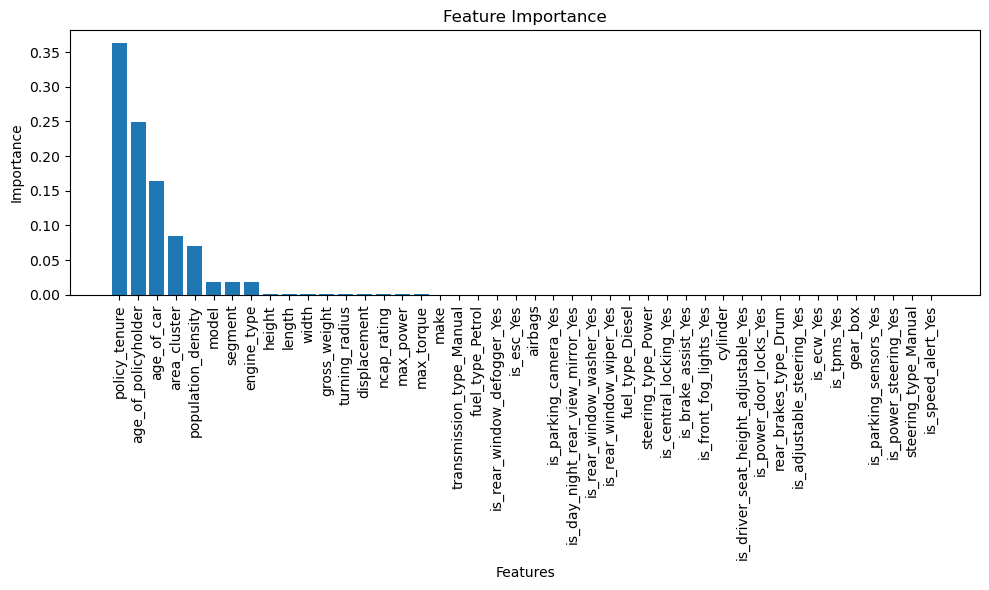

In [91]:
# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

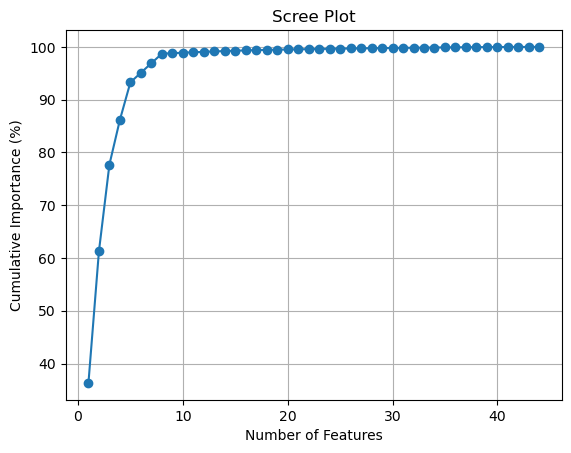

In [92]:
# Assuming you have a DataFrame called 'feature_importance_df' with 'Feature' and 'Importance' columns
cumulative_importance = np.cumsum(feature_importance_df['Importance'])
total_importance = np.sum(feature_importance_df['Importance'])

# Calculate the percentage of cumulative importance
cumulative_percentage = cumulative_importance / total_importance * 100

# Plot the scree plot
plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance (%)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

### Writing the encoded df to csv files

In [94]:
encoded_train_df.to_csv('encoded_train_df.csv',index=False)
encoded_val_df.to_csv('encoded_val_df.csv',index=False)
encoded_test_df.to_csv('encoded_test_df.csv',index=False)

In [95]:
encoded_val_df['is_claim'].value_counts()

0    11693
1      807
Name: is_claim, dtype: int64